# Trabajo Final: gráficos de tasas de homicidios

Este trabajo consistirá en analizar la de homicidios del SINADEF a través de los años y a nivel provincial en el año 2022

## Limpieza de datos

### Importamos las 3 bases de datos con las que trabajaremos

In [1]:
import pandas as pd
import os, geopandas as gpd

In [2]:
pob=pd.read_excel("proy_pob.xlsx")
pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DEPARTAMENTO  1889 non-null   object 
 1   PROVINCIA     1889 non-null   object 
 2   DISTRITO      1889 non-null   object 
 3   2018          1873 non-null   float64
 4   2019          1873 non-null   float64
 5   2020          1874 non-null   float64
 6   2021          1889 non-null   int64  
 7   2022          1889 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 118.2+ KB


In [3]:
pob.head(5)

,DEPARTAMENTO,PROVINCIA,DISTRITO,2018,2019,2020,2021,2022
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,36602.0,37870.0,39051.0,39691,40274
1,AMAZONAS,CHACHAPOYAS,ASUNCION,283.0,281.0,278.0,277,276
2,AMAZONAS,CHACHAPOYAS,BALSAS,1222.0,1202.0,1180.0,1169,1158
3,AMAZONAS,CHACHAPOYAS,CHETO,687.0,696.0,702.0,705,707
4,AMAZONAS,CHACHAPOYAS,CHILIQUIN,619.0,604.0,589.0,581,575


In [4]:
sinadef=pd.read_csv("C:/Users/ASUS/Documents/Cursos_verano_Qlab/Intro_python/Tareas/SINADEF_DATOS_ABIERTOS.csv")
sinadef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460297 entries, 0 to 1460296
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   N                           1460297 non-null  int64 
 1   DEPARTAMENTO_FALLECIMIENTO  1460297 non-null  object
 2   PROVINCIA_FALLECIMIENTO     1460297 non-null  object
 3   DISTRITO_FALLECIMIENTO      1460297 non-null  object
 4   TIPO_CDEF                   1460297 non-null  object
 5   TIPO_SEGURO                 1460297 non-null  object
 6   SEXO                        1460297 non-null  object
 7   TIEMPO_EDAD                 1460297 non-null  object
 8   EDAD                        1460297 non-null  int64 
 9   ESTADO_CIVIL                1460297 non-null  object
 10  NIVEL_DE_INSTRUCCION        1460297 non-null  object
 11  ETNIA                       1460297 non-null  object
 12  COD_UBIGEO_DOMICILIO        1460297 non-null  object
 13  PAIS_DOMICIL

In [5]:
import os, geopandas as gpd
MapProv=gpd.read_file(os.path.join("provincias", "Provincias.shp"))
MapProv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   IDDPTO      196 non-null    object  
 1   DEPARTAMEN  196 non-null    object  
 2   IDPROV      196 non-null    object  
 3   PROVINCIA   196 non-null    object  
 4   CAPITAL     196 non-null    object  
 5   FUENTE      196 non-null    object  
 6   geometry    196 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 10.8+ KB


### Limpieza proyeccion poblacional

In [6]:
#Cambiamos primero el nombre de las variables para que estas no estén con un número como nombre
pob.columns = ['DEPARTAMENTO','PROVINCIA','DISTRITO','pob_2018','pob_2019','pob_2020','pob_2021','pob_2022']
pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DEPARTAMENTO  1889 non-null   object 
 1   PROVINCIA     1889 non-null   object 
 2   DISTRITO      1889 non-null   object 
 3   pob_2018      1873 non-null   float64
 4   pob_2019      1873 non-null   float64
 5   pob_2020      1874 non-null   float64
 6   pob_2021      1889 non-null   int64  
 7   pob_2022      1889 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 118.2+ KB


In [7]:
def poblacion_por_provincia(pob):
    columnas_poblacion = [
        'pob_2018',
        'pob_2019',
        'pob_2020',
        'pob_2021',
        'pob_2022'
    ]
    
    df_resultado = (
        pob
        .groupby(['DEPARTAMENTO', 'PROVINCIA'], as_index=False)[columnas_poblacion]
        .sum()
    )
    
    return df_resultado


In [8]:
pob_prov = poblacion_por_provincia(pob)

In [9]:
pob_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DEPARTAMENTO  196 non-null    object 
 1   PROVINCIA     196 non-null    object 
 2   pob_2018      196 non-null    float64
 3   pob_2019      196 non-null    float64
 4   pob_2020      196 non-null    float64
 5   pob_2021      196 non-null    int64  
 6   pob_2022      196 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 10.8+ KB


### Limpieza de SINADEF

In [10]:
# Seleccionamos las columnas que deseamos
sinadef_prov = sinadef[['DEPARTAMENTO_FALLECIMIENTO','PROVINCIA_FALLECIMIENTO','ANIO','MUERTE_VIOLENTA']]

In [11]:
# Cambiaré los nombres para hacer un merge sin complicaciones más adelante
sinadef_prov.columns = ['DEPARTAMENTO','PROVINCIA','ANIO','MUERTE_VIOLENTA']

In [12]:
# Filtraremos las muertes en la variable MUERTE_VIOLENTA para quedarnos solo con aquellas que figuren como homicidios
sinadef_prov = sinadef_prov[sinadef_prov['MUERTE_VIOLENTA'] == 'HOMICIDIO']
sinadef_prov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12635 entries, 57 to 1459922
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DEPARTAMENTO     12635 non-null  object
 1   PROVINCIA        12635 non-null  object
 2   ANIO             12635 non-null  int64 
 3   MUERTE_VIOLENTA  12635 non-null  object
dtypes: int64(1), object(3)
memory usage: 493.6+ KB


In [13]:
# Calculamos los asesinatos por año y por provincia a través de un conteo
sinadef_prov = (
    sinadef_prov
    .groupby(
        [
            'DEPARTAMENTO',
            'PROVINCIA',
            'ANIO'
        ],
        as_index=False
    )
    .size()
    .rename(columns={'size': 'ASESINADOS'})
)


In [14]:
sinadef_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DEPARTAMENTO  1031 non-null   object
 1   PROVINCIA     1031 non-null   object
 2   ANIO          1031 non-null   int64 
 3   ASESINADOS    1031 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 32.3+ KB


In [15]:
sinadef_prov = sinadef_prov[sinadef_prov['ANIO'] != 2026]

In [16]:
# convertiré la base de formato long a wide
sinadef_wide = (
    sinadef_prov
    .pivot(
        index=['DEPARTAMENTO', 'PROVINCIA'],
        columns='ANIO',
        values='ASESINADOS'
    )
    .reset_index()
)

In [17]:
sinadef_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DEPARTAMENTO  186 non-null    object 
 1   PROVINCIA     186 non-null    object 
 2   2017          88 non-null     float64
 3   2018          114 non-null    float64
 4   2019          116 non-null    float64
 5   2020          112 non-null    float64
 6   2021          117 non-null    float64
 7   2022          117 non-null    float64
 8   2023          95 non-null     float64
 9   2024          129 non-null    float64
 10  2025          118 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.1+ KB


In [18]:
sinadef_wide.columns = ['DEPARTAMENTO','PROVINCIA','deads_2017','deads_2018','deads_2019','deads_2020','deads_2021','deads_2022','deads_2023','deads_2024','deads_2025']

In [19]:
sinadef_wide.head(5)

,DEPARTAMENTO,PROVINCIA,deads_2017,deads_2018,deads_2019,deads_2020,deads_2021,deads_2022,deads_2023,deads_2024,deads_2025
0,AMAZONAS,BAGUA,1.0,NaN,NaN,NaN,NaN,1.0,5.0,NaN,3.0
1,AMAZONAS,BONGARA,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AMAZONAS,CHACHAPOYAS,NaN,1.0,NaN,2.0,NaN,NaN,NaN,3.0,4.0
3,AMAZONAS,CONDORCANQUI,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,2.0
4,AMAZONAS,LUYA,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


## Gráficos

### Gráfico de homicidios por año

In [20]:
# Creo la función de tal manera que devuelva un pequeño dataframe para realizar el gráfico con mayor facilidad
def asesinatos_por_anio(df):
    df_anual = (
        df
        .groupby('ANIO', as_index=False)
        .agg({'ASESINADOS': 'sum'})
        .sort_values('ANIO')
    )
    
    return df_anual


In [21]:
df_anual = asesinatos_por_anio(sinadef_prov)

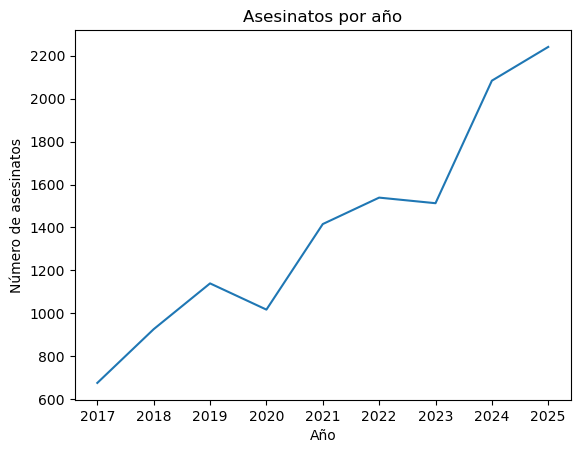

In [22]:
import matplotlib.pyplot as plt

plt.plot(df_anual['ANIO'], df_anual['ASESINADOS'])
plt.xlabel('Año')
plt.ylabel('Número de asesinatos')
plt.title('Asesinatos por año')
plt.show()


### Mapa con la tasa de homicidios por cien mil habitantes en el año 2025

In [23]:
# Haré trampa ligeramente. Para obtener dicha tasa la fórmula es la siguiente homicidios/poblacion*100000. Sin embargo, esto se realiza con unidades en 
# el mismo espacio y tiempo. En ese sentido, tanto el numero de homicidios como la cantidad de poblacion debe corresponder al mismo año para ser precisos.
# Dado que no existe una base de datos actualizada respecto a la proyección poblacional, se trabajará con la población del año 2022 para proccesarla junto
# al numero de homicidios del año 2025. 

In [24]:
# simplemente escojo las variables de interés, en este caso, las provincias y el  numero de habitantes por provincia en el 2022
pob_mapa = pob_prov[['PROVINCIA','pob_2022']]

In [25]:
pob_mapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PROVINCIA  196 non-null    object
 1   pob_2022   196 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [26]:
# acá se aplica lo mismo solo que con el numero de asesinados
sinadef_wide_map=sinadef_wide[['PROVINCIA','deads_2025']]
sinadef_wide_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROVINCIA   186 non-null    object 
 1   deads_2025  118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [27]:
pobdef = pd.merge(
    pob_mapa,
    sinadef_wide_map,
    on='PROVINCIA',
    how='left'
)
pobdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROVINCIA   196 non-null    object 
 1   pob_2022    196 non-null    int64  
 2   deads_2025  112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [28]:
# verifico si hay NAs
pobdef.isna().any().any()

np.True_

In [29]:
# Bueno, sí hay, en este caso, solo lo procesaré reemplazandolos con 0
pobdef = pobdef.fillna(0)
pobdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROVINCIA   196 non-null    object 
 1   pob_2022    196 non-null    int64  
 2   deads_2025  196 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [30]:
# Ahora sí crearemos la tasa de homicidios por cien mil habitantes por cada provincia
pobdef['tasa'] = (pobdef['deads_2025']/pobdef['pob_2022'])*100000
pobdef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PROVINCIA   196 non-null    object 
 1   pob_2022    196 non-null    int64  
 2   deads_2025  196 non-null    float64
 3   tasa        196 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.3+ KB


In [31]:
# Ahora que lo hemos creado, toca unir toda esta data con el mapa
mapa_100k = pd.merge(MapProv,pobdef,on='PROVINCIA',how='left')
mapa_100k.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   IDDPTO      196 non-null    object  
 1   DEPARTAMEN  196 non-null    object  
 2   IDPROV      196 non-null    object  
 3   PROVINCIA   196 non-null    object  
 4   CAPITAL     196 non-null    object  
 5   FUENTE      196 non-null    object  
 6   geometry    196 non-null    geometry
 7   pob_2022    189 non-null    float64 
 8   deads_2025  189 non-null    float64 
 9   tasa        189 non-null    float64 
dtypes: float64(3), geometry(1), object(6)
memory usage: 15.4+ KB


In [32]:
mapa_100k.head(5)

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,CAPITAL,FUENTE,geometry,pob_2022,deads_2025,tasa
0,01,AMAZONAS,0101,CHACHAPOYAS,CHACHAPOYAS,INEI,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...",64058.0,4.0,6.244341
1,01,AMAZONAS,0102,BAGUA,BAGUA,INEI,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...",85835.0,3.0,3.495078
2,01,AMAZONAS,0103,BONGARA,JUMBILLA,INEI,"POLYGON ((-77.72759 -5.1403, -77.72361 -5.1406...",26449.0,0.0,0.000000
3,01,AMAZONAS,0104,CONDORCANQUI,SANTA MARIA DE NIEVA,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",52082.0,2.0,3.840098
4,01,AMAZONAS,0105,LUYA,LAMUD,INEI,"POLYGON ((-78.13023 -5.9037, -78.13011 -5.9041...",47081.0,0.0,0.000000


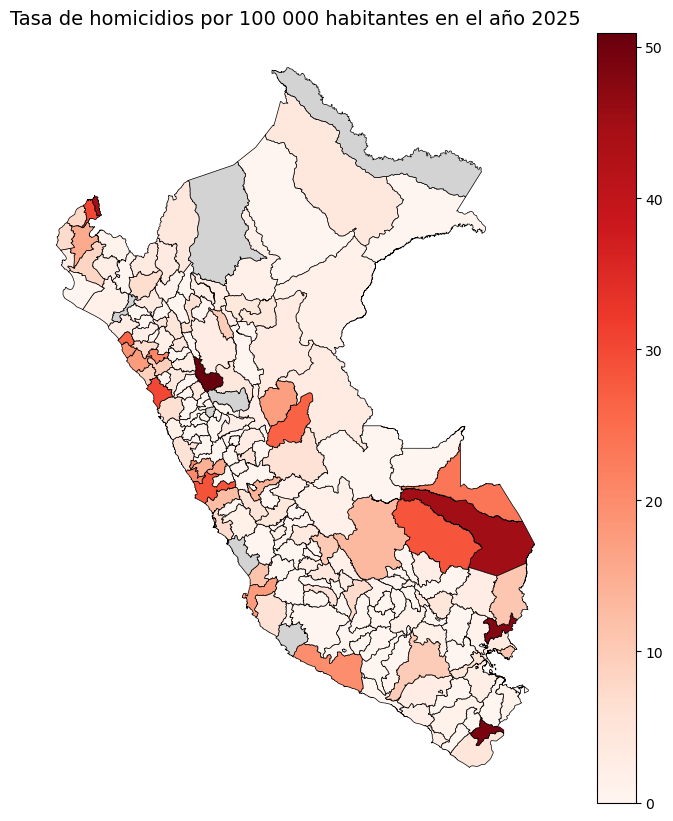

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

mapa_100k.plot(
    column='tasa',
    cmap='Reds',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    missing_kwds={
        'color': 'lightgrey',
        'label': 'Sin datos'
    }
)

ax.set_title('Tasa de homicidios por 100 000 habitantes en el año 2025', fontsize=14)
ax.axis('off')

plt.show()


In [39]:
!jupyter nbconvert --to html --no-input index.ipynb

[NbConvertApp] Converting notebook index.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 572139 bytes to index.html
